# Results of different #agent values

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','num_agents'], as_index=False).mean()
results.head()

,planner,num_agents,num_robots,f,d,active_time,completion_time,planner_time,damage,num_disabled
0,Additive100StaticLackPlanner,100,5.0,2.0,5.0,-1.0,295.301049,0.050759,24607.552585,22.000000
1,Additive100StaticLackPlanner,200,5.0,2.0,5.0,-1.0,296.097763,0.089071,49541.334819,38.000000
2,Additive100StaticLackPlanner,300,5.0,2.0,5.0,-1.0,297.310258,0.188747,74043.579017,63.333333
3,Additive100StaticLackPlanner,400,5.0,2.0,5.0,-1.0,297.531999,0.344468,98774.135178,91.000000
4,Additive100StaticLackPlanner,500,5.0,2.0,5.0,-1.0,296.880343,0.646766,122951.997807,119.000000


In [7]:
planners_names = ['StaticLineLackPlanner',
                  'SeparateStaticLackPlanner',
                  'Additive50StaticLackPlanner',
                  'Additive100StaticLackPlanner',
                  'IterativeAssignmentPlanner',
                  'KmeansAssignmentPlanner',
                  ]


planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Settings

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

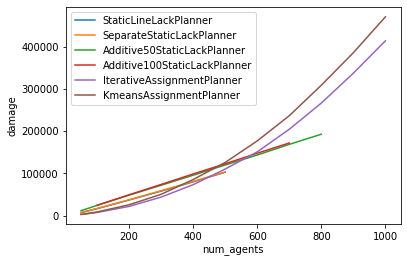

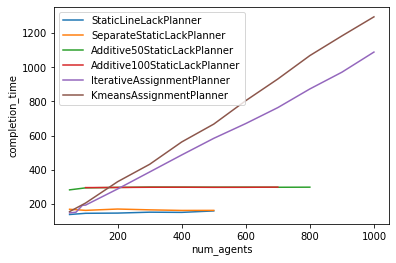

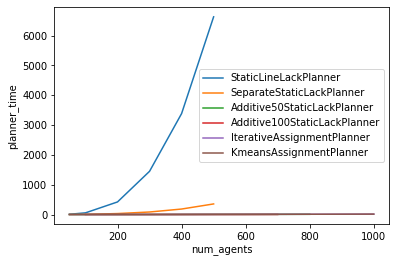

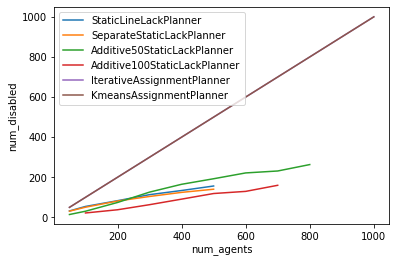

In [8]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for r in planners_results:
        plt.plot(list(r[x]),list(r[y]))

    plt.legend(planners_names)
    # plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()